# Demonstration of Microsstate Analysis Library

## Part one: Usage examples

### Read microstates

In [1]:
from ms_analysis import *
%cd ~/ms_analysis/4lzt
msfile = "ms_out/pH5eH0ms.txt"
mc = MC()
mc.readms(msfile)

/home/jupyter-jmao/ms_analysis/4lzt
Reading MC:0
Reading MC:1
Reading MC:2
Reading MC:3
Reading MC:4
Reading MC:5


#### Basic information of the microstates

In [2]:
print("MC temperature = %.3f" % mc.T)
print("MC pH = %.2f" % mc.pH)
print("MC fixed conformers = %s" % mc.fixedconfs)
print("Number of unique microstates = %d" % len(mc.microstates))
print("Number of total microstates = %d" % mc.counts)
print("Average energy of microstates = %.3f" % average_e(mc.microstates))

MC temperature = 298.150
MC pH = 5.00
MC fixed conformers = [10, 47, 87, 88, 89, 192, 201, 210, 211, 212, 213, 251, 278, 286, 694, 696, 842, 891, 899, 904, 905, 911, 974, 980, 995, 996, 1053, 1093, 1100, 1153, 1199, 1246, 1329]
Number of unique microstates = 2126677
Number of total microstates = 6600000
Average energy of microstates = -202.448


#### Query data in MC micorstates

In [3]:
# from conformer name to conformer index
print(mc.iconf_by_confname["LYS+1A0001_007"])

8


In [4]:
# free residues and its conformers
for ires in range(len(mc.free_residues)):
    print("%3d %s %s" % (ires, mc.free_residue_names[ires], mc.free_residues[ires]))

  0 NTRA0001_ [0, 1]
  1 LYSA0001_ [6, 7, 8, 9]
  2 PHEA0003_ [11, 12]
  3 ARGA0005_ [40, 41, 43, 44, 45]
  4 GLUA0007_ [50, 55, 57, 59, 60, 61, 63, 64, 65, 70, 73, 75, 79, 80, 81, 82, 83, 84]
  5 LEUA0008_ [85, 86]
  6 META0012_ [90, 91, 92]
  7 LYSA0013_ [101, 102, 103, 104, 105]
  8 ARGA0014_ [125, 127, 128, 130]
  9 HISA0015_ [131, 133, 135, 137, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 156]
 10 LEUA0017_ [157, 158, 159]
 11 ASPA0018_ [162, 164, 165, 168, 169]
 12 ASNA0019_ [170, 171]
 13 TYRA0020_ [172, 174, 175, 176]
 14 ARGA0021_ [189, 190, 191]
 15 SERA0024_ [196, 197, 198, 199, 200]
 16 ASNA0027_ [203, 204, 205, 206, 207]
 17 TRPA0028_ [208, 209]
 18 LYSA0033_ [233, 234, 237, 239, 241, 242, 243]
 19 GLUA0035_ [253, 254, 258, 259, 261, 263, 264]
 20 SERA0036_ [267, 268, 269]
 21 ASNA0037_ [270, 271, 272, 273, 274]
 22 PHEA0038_ [275, 277]
 23 THRA0040_ [280, 281]
 24 GLNA0041_ [282, 283, 284, 285]
 25 THRA0043_ [287, 288, 289, 290, 291, 292, 293, 29

In [5]:
# from conformer index to residue index
TRPA0123 = [1200, 1203]
for iconf in TRPA0123:
    ires = mc.ires_by_iconf[iconf]
    print("%5d %s -> %3d %s" % (iconf, mc.conformers[iconf].confid, ires, mc.free_residue_names[ires]))

 1200 TRP01A0123_001 ->  81 TRPA0123_
 1203 TRP01A0123_004 ->  81 TRPA0123_


### Example 1: Bin microstates based on energy

In [6]:
# bin whole range
erange, total_counts = bin_mscounts_total(mc.microstates)
_, uniq_counts = bin_mscounts_unique(mc.microstates)
print("%8s %6s %6s" % ("Energy", "#total", "#uniq"))
for i in range(len(erange)):
    print("%8.3f %6d %6d" % (erange[i], total_counts[i], uniq_counts[i]))

  Energy #total  #uniq
-217.151     13      3
-216.796     16      6
-216.440     84     21
-216.085    162     32
-215.730    235     64
-215.374    372    104
-215.019    764    202
-214.664   1334    337
-214.308   1821    463
-213.953   2360    634
-213.598   3240    886
-213.242   4387   1242
-212.887   6486   1766
-212.532   8394   2328
-212.176  11528   3132
-211.821  14031   4001
-211.466  17797   5007
-211.111  23040   6420
-210.755  28661   8160
-210.400  35771  10226
-210.045  43404  12282
-209.689  51909  14879
-209.334  60922  17899
-208.979  71835  21050
-208.623  83413  24540
-208.268  94307  28210
-207.913 107233  31950
-207.557 121385  36268
-207.202 135099  40622
-206.847 148366  44841
-206.491 158757  48166
-206.136 171495  52381
-205.781 183609  56297
-205.425 192485  59439
-205.070 203503  63279
-204.715 211851  66290
-204.359 217864  68407
-204.004 222364  70510
-203.649 226547  71973
-203.293 225926  72481
-202.938 226560  72817
-202.583 224454  72384
-202.227 22

In [7]:
# bin a customized range
bin_range = [-210, -200, -190, -180]
erange, total_counts = bin_mscounts_total(mc.microstates, erange=bin_range)
_, uniq_counts = bin_mscounts_unique(mc.microstates, erange=bin_range)
print("%8s %6s %6s" % ("Energy", "#total", "#uniq"))
for i in range(len(erange)):
    print("%8.3f %6d %6d" % (erange[i], total_counts[i], uniq_counts[i]))

  Energy #total  #uniq
-210.000 4667944 1468954
-200.000 1749833 604812
-190.000  16824   6474
-180.000      0      0


### Example 2. Microstates selection - Cause and effect

GLUA0035_, d= 100.000


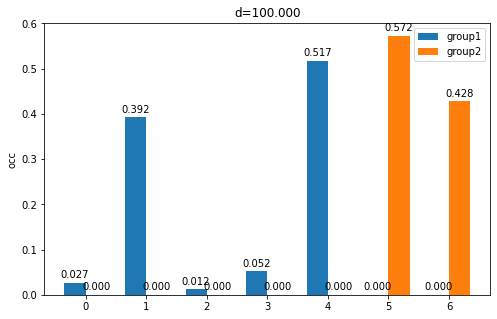

GLU01A0035_001  0.027  0.000
GLU01A0035_002  0.392  0.000
GLU01A0035_006  0.012  0.000
GLU02A0035_007  0.052  0.000
GLU02A0035_009  0.517  0.000
GLU-1A0035_011  0.000  0.572
GLU-1A0035_012  0.000  0.428

ASNA0044_, d= 0.013


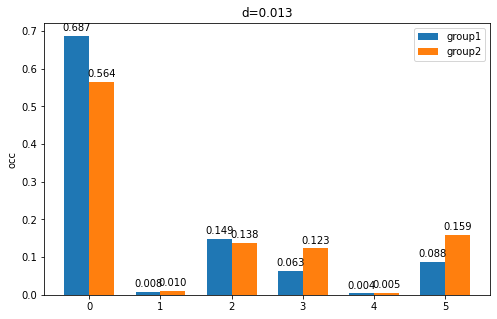

ASN01A0044_001  0.687  0.564
ASN01A0044_002  0.008  0.010
ASN01A0044_003  0.149  0.138
ASN01A0044_004  0.063  0.123
ASN01A0044_005  0.004  0.005
ASN01A0044_006  0.088  0.159

ASNA0046_, d= 0.012


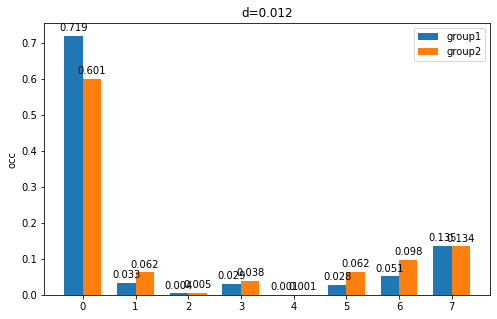

ASN01A0046_001  0.719  0.601
ASN01A0046_002  0.033  0.062
ASN01A0046_003  0.004  0.005
ASN01A0046_004  0.029  0.038
ASN01A0046_006  0.001  0.001
ASN01A0046_007  0.028  0.062
ASN01A0046_008  0.051  0.098
ASN01A0046_009  0.135  0.134

ASPA0052_, d= 0.080


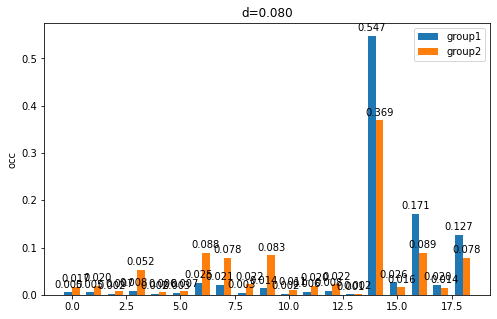

ASP01A0052_002  0.005  0.017
ASP01A0052_003  0.005  0.020
ASP01A0052_004  0.002  0.007
ASP01A0052_006  0.008  0.052
ASP01A0052_009  0.002  0.006
ASP01A0052_010  0.003  0.007
ASP02A0052_011  0.025  0.088
ASP02A0052_012  0.021  0.078
ASP02A0052_013  0.003  0.022
ASP02A0052_014  0.014  0.083
ASP02A0052_016  0.002  0.011
ASP02A0052_017  0.006  0.020
ASP02A0052_018  0.008  0.022
ASP02A0052_019  0.001  0.002
ASP-1A0052_020  0.547  0.369
ASP-1A0052_021  0.026  0.016
ASP-1A0052_022  0.171  0.089
ASP-1A0052_023  0.020  0.014
ASP-1A0052_024  0.127  0.078



In [8]:
# Example 2: When GLU35 is ionized, what residues change conformation?
glu_charged_confs = ["GLU-1A0035_011", "GLU-1A0035_012", "GLU-1A0035_013", "GLU-1A0035_011"]
glu_charged_ms, glu_neutral_ms = mc.select_by_conformer(mc.microstates, conformer_in=glu_charged_confs)
conf_occ_glu_charged = mc.get_occ(glu_charged_ms)
conf_occ_glu_neutral = mc.get_occ(glu_neutral_ms)
for res in mc.free_residues:
    resid = mc.conformers[res[0]].resid
    prob1 = [conf_occ_glu_neutral[ic] for ic in res]
    prob2 = [conf_occ_glu_charged[ic] for ic in res]
    d = bhata_distance(prob1, prob2)
    if d > 0.01:
        print("%s, d= %.3f" % (resid, d))
        plot_prob(prob1, prob2, d)
        for ic in res:
            print("%s %6.3f %6.3f" % (mc.conformers[ic].confid, conf_occ_glu_neutral[ic], conf_occ_glu_charged[ic]))
        print()

### Example 3. Microstates selection - Thermaldynamic box

GLU35 and ASP52 ionization

<pre>
Group A: GLU35-H | ASP52-H 
Group B: GLU35-H | ASP52-
Group C: GLU35-  | ASP52-H 
Group D: GLU35-  | ASP52-
</pre>

The reaction is A to D, there are two paths A to B to D, and A to C to D.

In [9]:
# find charged GLU35 and ASP52 conformers:
GLU35_ionized = [x.confid for x in mc.conformers if x.confid.find("GLU-1A0035") ==0]
print(GLU35_ionized)

ASP52_ionized = [x.confid for x in mc.conformers if x.confid.find("ASP-1A0052") ==0]
print(ASP52_ionized)

['GLU-1A0035_011', 'GLU-1A0035_012', 'GLU-1A0035_013', 'GLU-1A0035_014']
['ASP-1A0052_020', 'ASP-1A0052_021', 'ASP-1A0052_022', 'ASP-1A0052_023', 'ASP-1A0052_024']


In [10]:
GLU35_ionized_ms, GLU35_neutral_ms = mc.select_by_conformer(mc.microstates, conformer_in=GLU35_ionized)

In [11]:
GLU35_ionized_ASP52_ionized_ms, GLU35_ionized_ASP52_neutral_ms = mc.select_by_conformer(GLU35_ionized_ms, conformer_in=ASP52_ionized) 

In [12]:
GLU35_neutral_ASP52_ionized_ms, GLU35_neutral_ASP52_neutral_ms = mc.select_by_conformer(GLU35_neutral_ms, conformer_in=ASP52_ionized) 

In [13]:
Group_A_ms = GLU35_neutral_ASP52_neutral_ms
Group_B_ms = GLU35_neutral_ASP52_ionized_ms
Group_C_ms = GLU35_ionized_ASP52_neutral_ms
Group_D_ms = GLU35_ionized_ASP52_ionized_ms

In [14]:
Group_A_E = average_e(Group_A_ms)
Group_B_E = average_e(Group_B_ms)
Group_C_E = average_e(Group_C_ms)
Group_D_E = average_e(Group_D_ms)

In [15]:
print("Box with E:\n")
print("dE from A -> B %8.3f" % (Group_B_E - Group_A_E))
print("dE from B -> D %8.3f" % (Group_D_E - Group_B_E))
print()
print("dE from A -> C %8.3f" % (Group_C_E - Group_A_E))
print("dE from C -> D %8.3f" % (Group_D_E - Group_C_E))
print()
print("dE from A -> D %8.3f" % (Group_D_E - Group_A_E))

Box with E:

dE from A -> B   -2.750
dE from B -> D    0.906

dE from A -> C   -0.227
dE from C -> D   -1.617

dE from A -> D   -1.844


In [16]:
G_AB = -math.log(get_count(Group_B_ms)/get_count(Group_A_ms))/Kcal2kT
G_BD = -math.log(get_count(Group_D_ms)/get_count(Group_B_ms))/Kcal2kT
G_AC = -math.log(get_count(Group_C_ms)/get_count(Group_A_ms))/Kcal2kT
G_CD = -math.log(get_count(Group_D_ms)/get_count(Group_C_ms))/Kcal2kT

In [17]:
print("Box with dG:\n")
print("dG from A -> B      %8.3f" % (G_AB))
print("dG from B -> D      %8.3f" % (G_BD))
print("dG from A -> B -> D %8.3f" % (G_AB + G_BD))
print()
print("dG from A -> C      %8.3f" % (G_AC))
print("dG from C -> D      %8.3f" % (G_CD))
print("dG from A -> C -> D %8.3f" % (G_AC + G_CD))

Box with dG:

dG from A -> B        -1.257
dG from B -> D         1.085
dG from A -> B -> D   -0.171

dG from A -> C        -0.016
dG from C -> D        -0.155
dG from A -> C -> D   -0.171


### Example 4. Charged microstates

In [18]:
# Which charge microstate is the most dominant?
charge_microstates = mc.convert_to_charge_ms()

In [19]:
charge_microstates.sort(key=lambda x: x.count)
total_crgms = 0

for crg_ms in charge_microstates:
    total_crgms += crg_ms.count

for crg_ms in charge_microstates[-10:]:
    print(crg_ms.state(), crg_ms.count, crg_ms.average_E)
print("%d charge microstates" % len(charge_microstates))
print("%d total microstates" % total_crgms)

[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 1, -1] 157008 -203.74656655210362
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, -1, 0, 0, 0, 0, 1, 1, -1] 189401 -202.4038766044846
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, -1] 194164 -201.8021504286579
[1, 1, 0, 1, -1, 0, 0, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, -1, 0, 0, 0, 0, 0

#### How do top charge microstates dominate the ms population

In [20]:
top_picks = 50
top_crgms = charge_microstates[-top_picks:]
top_crgms.sort(key=lambda x: x.count, reverse=True)
top_counts = [x.count for x in top_crgms]
top_averageE = [x.average_E for x in top_crgms]
top_percentage = [x.count/total_crgms for x in top_crgms]

print("%8s %8s %8s %8s" % ("Counts", "%", "Accum %", "Energy"))
accum_pct = 0.0
top_accum = []
for i in range(top_picks):
    accum_pct += top_percentage[i]
    top_accum.append(accum_pct)
    print("%8d %8.3f %8.3f %8.2f" % (top_counts[i], top_percentage[i], accum_pct, top_averageE[i]))

  Counts        %  Accum %   Energy
 1610539    0.244    0.244  -203.59
 1044415    0.158    0.402  -204.67
  271148    0.041    0.443  -202.64
  246687    0.037    0.481  -201.77
  217560    0.033    0.514  -201.02
  203758    0.031    0.545  -200.81
  202729    0.031    0.575  -201.74
  194164    0.029    0.605  -201.80
  189401    0.029    0.633  -202.40
  157008    0.024    0.657  -203.75
  137921    0.021    0.678  -203.61
  136342    0.021    0.699  -202.78
  130590    0.020    0.719  -201.76
  129731    0.020    0.738  -202.65
  122579    0.019    0.757  -202.58
  120400    0.018    0.775  -202.08
   66119    0.010    0.785  -201.65
   48687    0.007    0.792  -202.57
   42831    0.006    0.799  -200.86
   38825    0.006    0.805  -201.51
   36696    0.006    0.810  -201.18
   35606    0.005    0.816  -200.58
   33908    0.005    0.821  -201.03
   33124    0.005    0.826  -200.56
   31179    0.005    0.831  -200.07
   30246    0.005    0.835  -202.04
   29589    0.004    0.840  

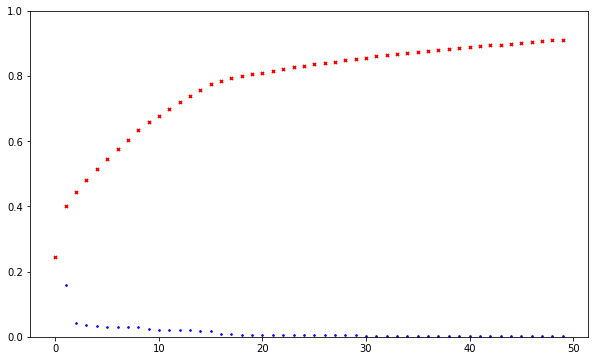

In [21]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_ylim([0, 1])
ax1.scatter(range(top_picks), top_percentage, s=10, c='b', marker = ".")
ax1.scatter(range(top_picks), top_accum, s=10, c='r', marker="x")
plt.show()

In [47]:
# Top 10 charge microstates charge comparison
# print(len(mc.free_residue_names))
# print(len(top_crgms[0].state()))
for i_res in range(len(mc.free_residue_names)):
    resname = mc.free_residue_names[i_res]
    charges = []
    for i in range(10):
        charges.append(top_crgms[i].state()[i_res])
    charges_str = " ".join(["%2d" % x for x in charges])
    if len(set(charges))>1:
        print(resname, charges_str)
    

HISA0015_  1  1  1  0  1  1  1  1  1  1
GLUA0035_  0  0 -1  0 -1  0  0  0  0 -1
ASPA0052_ -1 -1 -1 -1  0  0 -1 -1 -1 -1
ASPA0066_ -1 -1 -1 -1 -1 -1 -1 -1  0 -1
ASPA0101_  0 -1  0  0  0  0  0  0  0 -1
ASPA0119_ -1 -1 -1 -1 -1 -1 -1  0 -1 -1
CTRA0129_ -1 -1 -1 -1 -1 -1  0 -1 -1 -1


## Part 2: Memory saving

### Memory usage comparing with the old library

4lzm quick run
Memory usage with old library: 3.8 GB
Memory usage with new library: 1.1 GB

In [36]:
print("Number of unique microstates = %d" % len(mc.microstates))
print("Number of total microstates = %d" % mc.counts)
print("Percentage of unique microstates = %.3f%%" % (len(mc.microstates)/mc.counts*100))

Number of unique microstates = 2126677
Number of total microstates = 6600000
Percentage of unique microstates = 32.222%


### Which part saves memory

In [27]:
# Microstate ID:
old_id = mc.microstates[0].state()
print("Old microstate ID is a list")
print(old_id)
print("Size of the ID %d bytes" % old_id.__sizeof__())

print()
# new microstate id:
new_id = mc.microstates[0].stateid
print("New microstate ID is compressed string")
print(new_id)
print("Size of the ID %d bytes" % new_id.__sizeof__())


Old microstate ID is a list
[1, 8, 12, 40, 81, 85, 92, 103, 125, 156, 158, 169, 170, 174, 189, 197, 203, 208, 233, 261, 267, 270, 275, 281, 282, 287, 296, 386, 402, 413, 460, 468, 481, 519, 538, 545, 549, 552, 562, 563, 582, 680, 692, 697, 728, 821, 839, 845, 889, 894, 900, 902, 908, 912, 916, 928, 931, 952, 956, 963, 979, 989, 1022, 1042, 1050, 1055, 1070, 1073, 1080, 1087, 1094, 1099, 1101, 1131, 1136, 1149, 1162, 1170, 1187, 1188, 1192, 1203, 1205, 1238, 1321, 1333]
Size of the ID 744 bytes

New microstate ID is compressed string
b'x\x9c\x1d\x90Q\x16D!\x08B\xb7\xc2\x12D\xb3\xa7\xfb\xdf\xd8\xdc\xe6\x03\xf2\x98\x11h\x8d\x9c:\xa1\xb1\xa6\xb5)G\xd1j\xb9/\xe0\xfa\xae\xfc\x058\xf2P\xef\xa7d&c\x94\xc5y\r\xe81\x93_+Q\xcaI@o\xafj.\xfa\xfc\xe1\xd2\xb9\x01F\x87\x99\xf6\xaak\xd4\xa7\x01u\xa7\xfa>\x94\x9a\xf7wB\x17?\x97\xff\xbe\x1cM\xe2\xb0V\xc3\xfc\xe0c\xf6h#@\x82\xd1\x92c}\x89@]\xd6\xa2\xb7dX\xf4\xf6[\xed\xf3\x1e\xf9\x02\x9eG\x1d\x8f\xc8\x19/\\|\xa4\x8ey\x15\xbe\x1d\x88C\xbcp\x18\xaa?\xb1\x10\

### Reduction of redundancy
Old microstates are in a list that some elements are identical, as they match the line in mc_out files.
New microstates are a list that every element is unique.

Old list elements: 2146850

New list elements: 2126677


### Use partial MC data

In [28]:
msfile = "ms_out/pH5eH0ms.txt"
mc_partial = MC()
mc_partial.readms(msfile, MC=[2])

Reading MC:2


In [37]:
print("Number of unique microstates = %d" % len(mc_partial.microstates))
print("Number of total microstates = %d" % mc_partial.counts)
print("Percentage of unique microstates = %.3f%%" % (len(mc_partial.microstates)/mc_partial.counts*100))

Number of unique microstates = 355073
Number of total microstates = 1100000
Percentage of unique microstates = 32.279%
